# Logistic Regression Project: Diabetes Prediction

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [5]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('_mpl-gallery')

In [6]:
from sklearn.model_selection import train_test_split , GridSearchCV, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics


In [7]:
# import diabetes dataset
data = pd.read_csv("../data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#  1. Dataset Overview 

In [8]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# 2. Cleaning and Preparing Data

In [9]:
df.isnull().sum()
# df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

Observamos 9 columnas que no tiene valores nulos

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
df.duplicated().sum()

np.int64(0)

**Distribuciones de los datos**

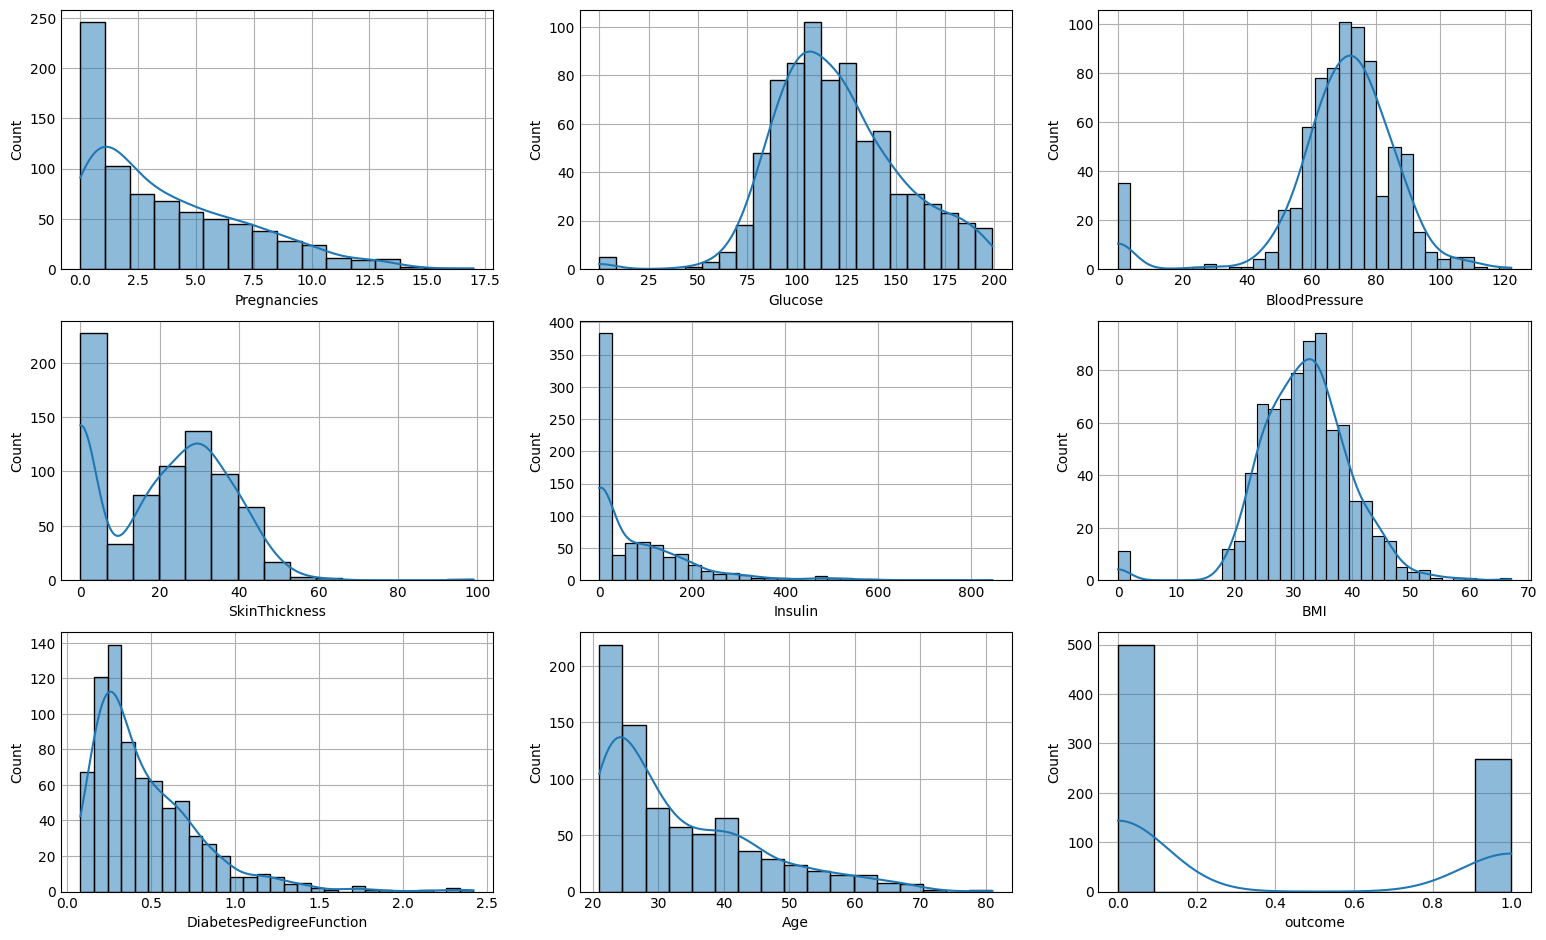

In [12]:
%matplotlib inline
fig, ax = plt.subplots(3,3,figsize=(15,9))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
plt.show()

In [13]:
df1 = df.copy()
zero_col = ['Glucose','Insulin','SkinThickness','BloodPressure','BMI']
df1[zero_col] = df1[zero_col].replace(0, np.nan)

In [14]:
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
outcome                       0
dtype: int64

In [15]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

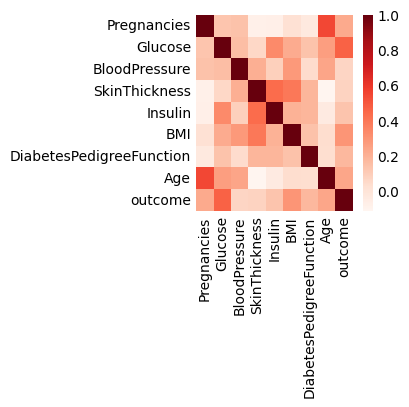

In [16]:
#%matplotlib inline
sns.heatmap(data.corr(),  cmap='Reds')
#plt.show()

In [17]:
for col in ['Glucose','Insulin','SkinThickness']:
    median_col = np.median(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(median_col)
for col in ['BMI','BloodPressure']:
    mean_col = np.mean(df1[df1[col].notna()][col])
    df1[col] = df1[col].fillna(mean_col)

In [18]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
outcome                     0
dtype: int64

In [19]:
df1.info()

<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# 3.Exploratory Data Analysis (EDA)

### 3.1.Univariate Analysis:

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


- According to above table, Most people in this dataset do not have diabetes.

#### 3.2.Numeric - Numeric Bivariate Analysis:

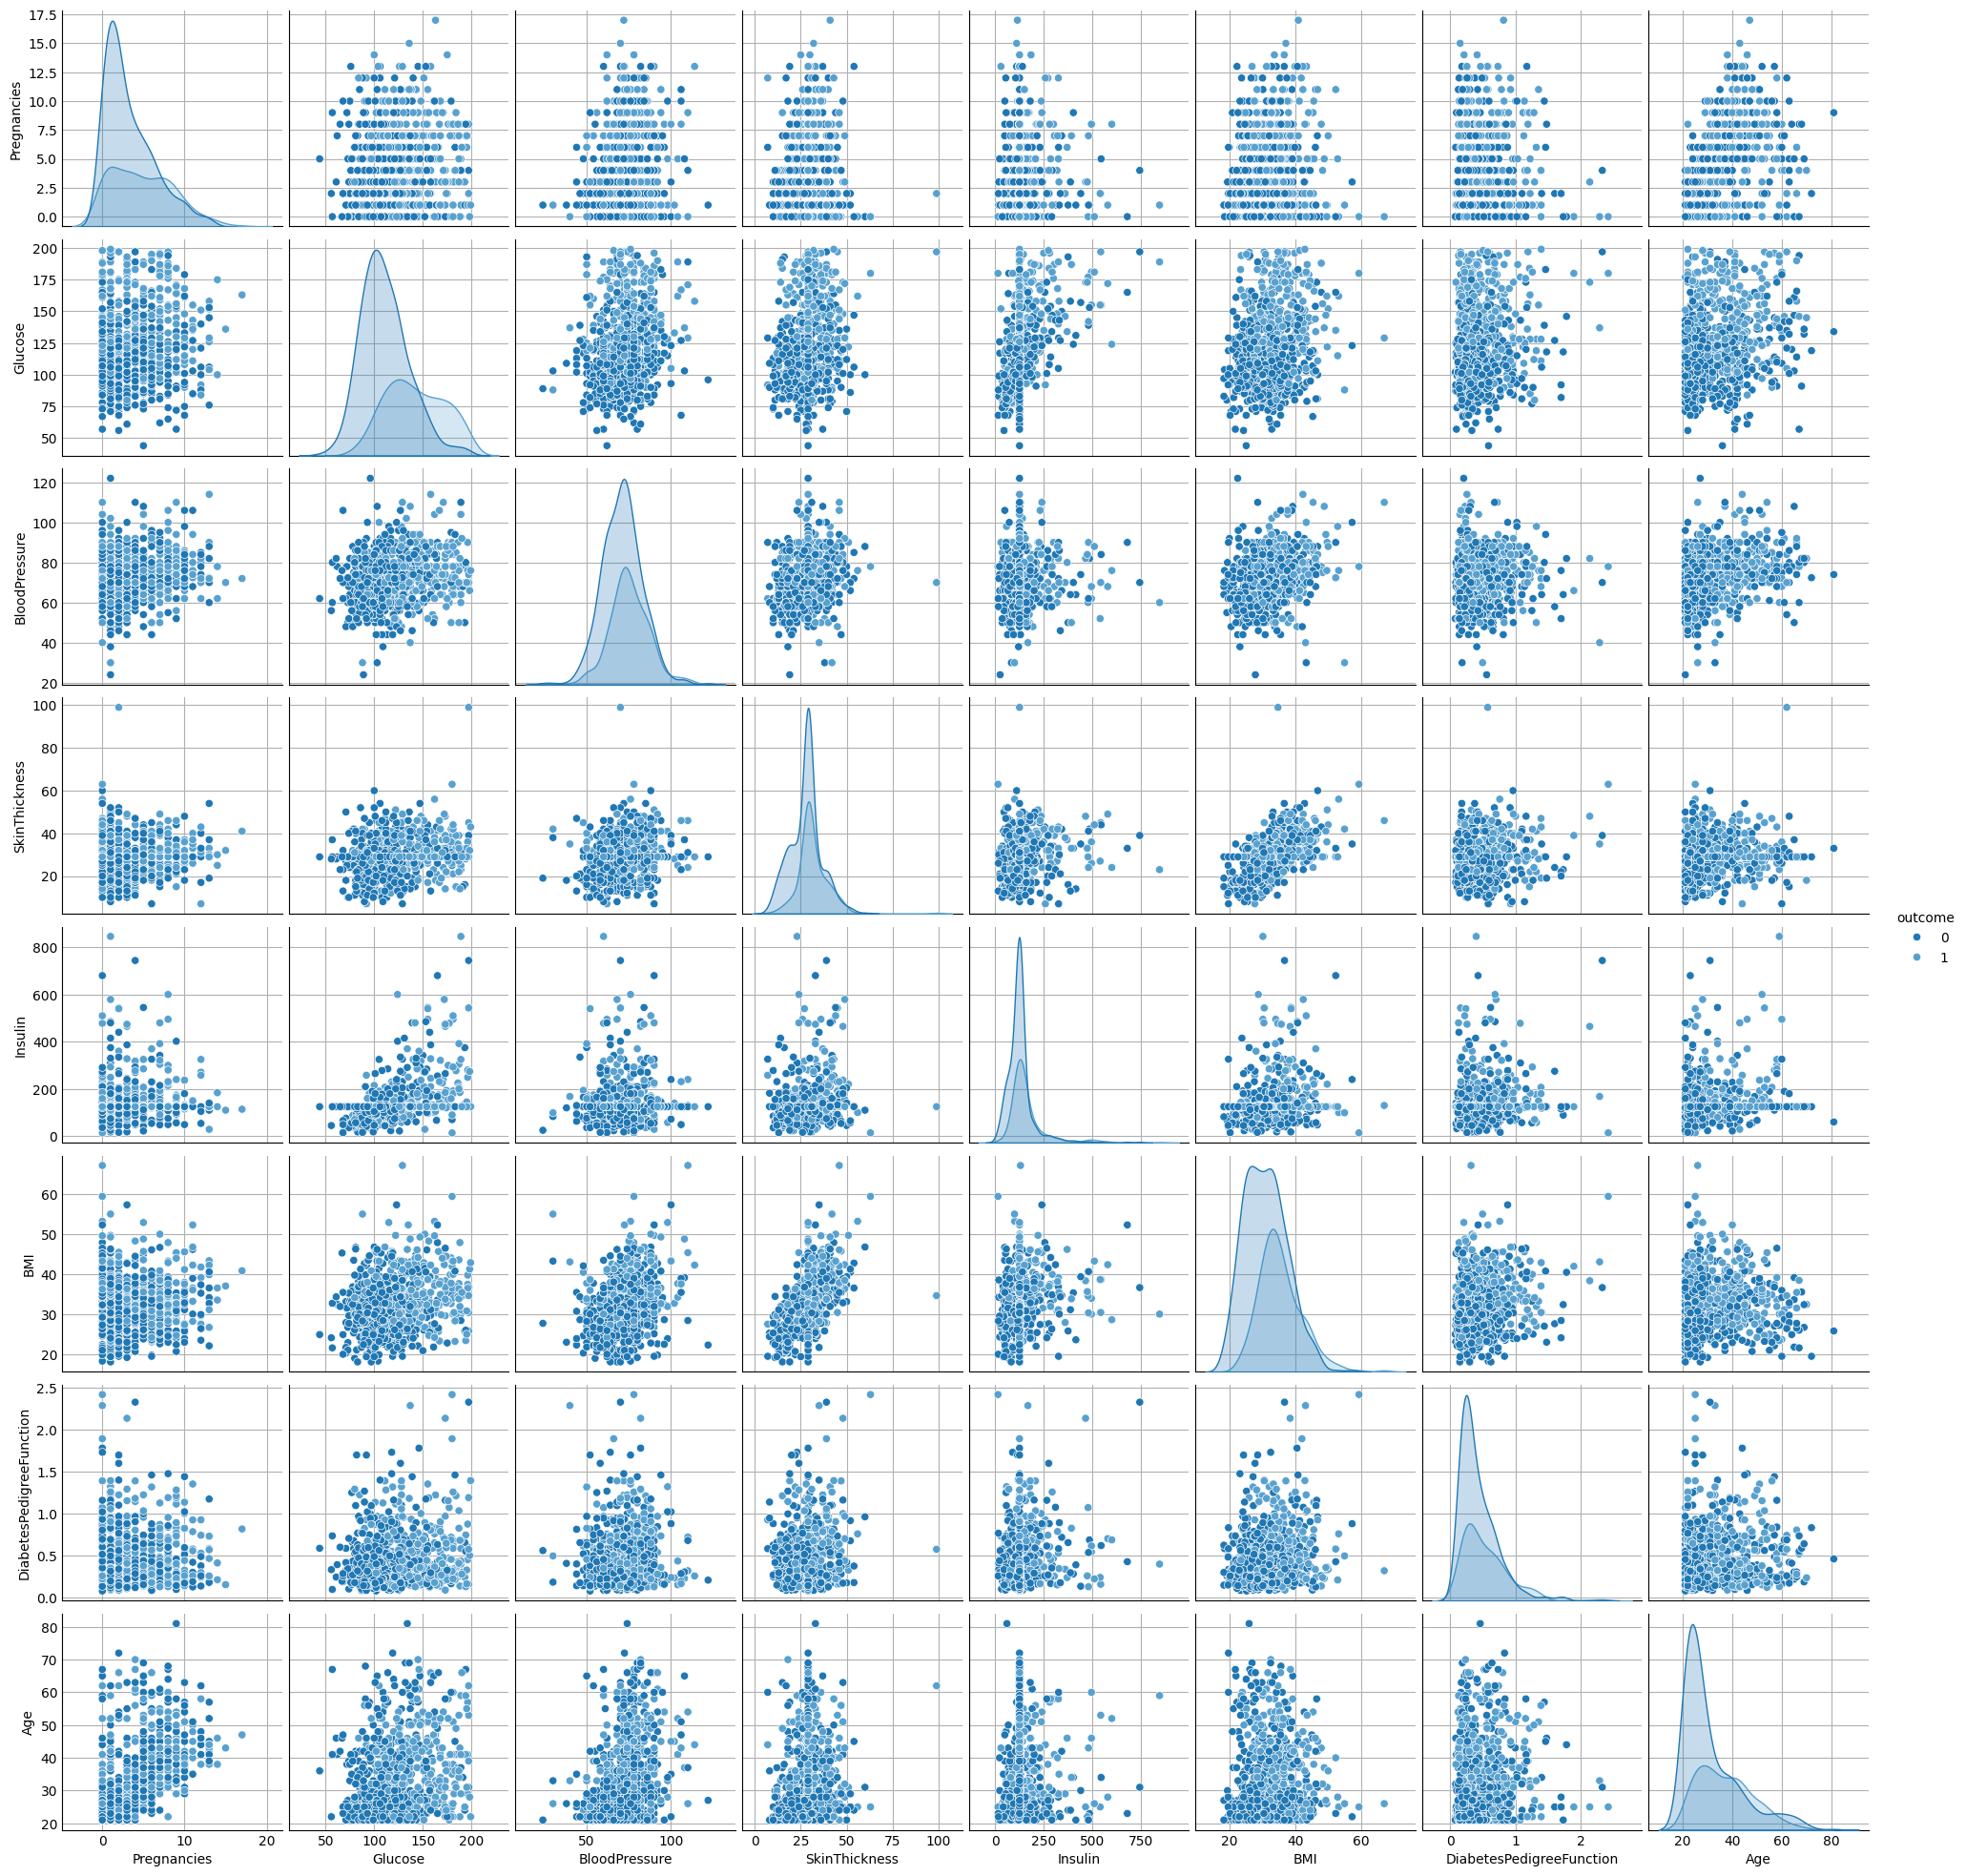

In [21]:
%matplotlib inline
sns.pairplot(data=df1, diag_kind='kde', hue='outcome')
plt.show()

In [22]:
fig = go.Figure()
my_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
           'Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in my_cols:
    fig.add_trace(go.Box(y=df1[col], name=f'{col}'))
fig.show()

# 4.Model

In [23]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [24]:
# define x and y for modeling
x = df1.drop('outcome', axis=1)
y = df1.outcome

In [25]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm

array([[ 0.63994726,  0.86604475, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [26]:
# convert x_train_st to DataFrame
x = pd.DataFrame(x_norm, index=x.index, columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.033518,0.670643,-0.181541,0.166292,0.468492,1.425995
1,-0.844885,-1.205066,-0.529859,-0.012301,-0.181541,-0.852531,-0.365061,-0.190672
2,1.233880,2.016662,-0.695306,-0.012301,-0.181541,-1.332833,0.604397,-0.105584
3,-0.844885,-1.073567,-0.529859,-0.695245,-0.540642,-0.634212,-0.920763,-1.041549
4,-1.141852,0.504422,-2.680669,0.670643,0.316566,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.297376,2.150354,0.455573,0.064409,-0.908682,2.532136
764,-0.547919,0.011301,-0.198965,-0.239949,-0.181541,0.632039,-0.398282,-0.531023
765,0.342981,-0.021574,-0.033518,-0.695245,-0.332132,-0.910750,-0.685193,-0.275760
766,-0.844885,0.142800,-1.026200,-0.012301,-0.181541,-0.343120,-0.371101,1.170732


In [45]:
x = df.drop('outcome', axis=1)
y = df.outcome

In [46]:
# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
# define model and fit model
lr = LogisticRegression(C=1)
lr.fit(x_train, y_train)



,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [48]:
lr.coef_

array([[ 0.09089043,  0.03421397, -0.01395748,  0.00288146, -0.00144199,
         0.08916714,  0.82346336,  0.01567842]])

In [49]:
lr.intercept_

array([-8.02180669])

In [50]:
pd.DataFrame(
    {"feature_name": lr.feature_names_in_, "feature_coef": lr.coef_[0], }
)

,feature_name,feature_coef
0,Pregnancies,0.090890
1,Glucose,0.034214
2,BloodPressure,-0.013957
3,SkinThickness,0.002881
4,Insulin,-0.001442
5,BMI,0.089167
6,DiabetesPedigreeFunction,0.823463
7,Age,0.015678


In [31]:
# prediction and results
y_pred = lr.predict(x_test)
y_pred_proba = lr.predict_proba(x_test)


In [32]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [33]:
print("Proba tener diabetes", y_pred_proba[25][1]*100, "%")

Proba tener diabetes 34.05846667617676 %


In [34]:
y_test.iloc[25]

np.int64(0)

In [35]:
x_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,0.936914,0.931794,4.628226e-01,-0.012301,-0.169957,0.399166,0.664800,1.766346
118,0.046014,-0.810569,-1.026200e+00,-0.695245,-0.181541,-0.619657,-0.087210,-0.956462
247,-1.141852,1.424916,1.455504e+00,0.442995,6.247517,2.888004,-0.135532,-0.871374
157,-0.844885,-0.416071,-1.357094e+00,-0.922893,-0.065702,-1.056296,1.090636,-0.871374
468,1.233880,-0.054449,1.175571e-15,-0.012301,-0.181541,-0.357674,-0.872441,0.404942


In [36]:
lr.intercept_

array([-0.7957308])

In [37]:
lr.coef_

array([[ 0.32243994,  1.12737303, -0.16839343, -0.03214924, -0.12468966,
         0.65871156,  0.26577799,  0.20981084]])

In [38]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [39]:
y_pred_proba

array([[0.03694269, 0.96305731],
       [0.83342466, 0.16657534],
       [0.91444707, 0.08555293],
       [0.32682894, 0.67317106],
       [0.88844804, 0.11155196],
       [0.96308101, 0.03691899],
       [0.2344009 , 0.7655991 ],
       [0.13046621, 0.86953379],
       [0.6098598 , 0.3901402 ],
       [0.64213513, 0.35786487],
       [0.40784333, 0.59215667],
       [0.03015772, 0.96984228],
       [0.74078509, 0.25921491],
       [0.83703811, 0.16296189],
       [0.90305967, 0.09694033],
       [0.860131  , 0.139869  ],
       [0.12215747, 0.87784253],
       [0.97750562, 0.02249438],
       [0.62474075, 0.37525925],
       [0.74446107, 0.25553893],
       [0.34570923, 0.65429077],
       [0.55738474, 0.44261526],
       [0.92116814, 0.07883186],
       [0.95263558, 0.04736442],
       [0.94864262, 0.05135738],
       [0.65941533, 0.34058467],
       [0.96143501, 0.03856499],
       [0.07984503, 0.92015497],
       [0.90067025, 0.09932975],
       [0.8646061 , 0.1353939 ],
       [0.

In [40]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.84      0.91      0.87       107
   with diabetes       0.74      0.60      0.66        47

        accuracy                           0.81       154
       macro avg       0.79      0.75      0.76       154
    weighted avg       0.81      0.81      0.81       154



Text(0.5, 203.55555555555554, 'Predicted label')

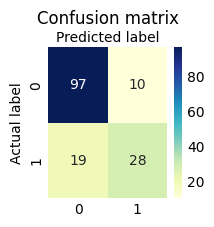

In [41]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=['without diabetes', 'with diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')